# Comparing estimators

In this notebook, we will compare several estimators of the same quantity. Suppose that 5 different teams are given measurements of, say, $H_0$, and are given the task to combine them into a single measurement. It means that they have to devise a function of the data, that yields the desired parameter ($H_0$). 

Team 1 takes the fourth measurement and discards the rest : $\hat{H_0} = H_{0,4}$

Team 2 takes the max and the min and average them $\hat{H_0} = \frac{\mathrm{min}(H_{0,i}) + \mathrm{max}(H_{0,i})}{2}$ 

Team 3 takes the sample average $\hat{H_0} = \frac{\sum_i H_{0,i}}{N}$

Team 4 takes the geometric mean $\hat{H_0} = \left(\Pi_i H_{0,i}\right)^{1/N}$

Team 5 decides to use the weighted average $\hat{H_0} = \frac{\sum_i H_{0,i}/\sigma_i^2}{\sum_i 1/\sigma_i^2}$

Which of these estimators would you use ?

In [7]:
import numpy as np
import scipy as sp
import scipy.stats as stats

%matplotlib inline
pl.rcParams['figure.figsize'] = (10.0, 8.0)
pl.rcParams['font.size'] = 18

In [8]:
# each team stores its results in an array
N_realizations = 1000
X0 = np.zeros(N_realizations)
X1 = np.zeros(N_realizations)
X2 = np.zeros(N_realizations)
X3 = np.zeros(N_realizations)
X4 = np.zeros(N_realizations)

In [9]:
N_measurements = 15
H0 = 70. # km/s/Mpc
sigmas = np.random.uniform(0.5, 10., N_measurements)

for i in range(N_realizations):
    H = np.random.normal(H0, scale=sigmas, size=N_measurements)
    X0[i] = H[3]
    X1[i] = 0.5 * (H.min() + H.max())
    X1[i] = H.max()
    X2[i] = H.mean()
    X3[i] = np.power(H.prod(), 1./N_measurements)
    X4[i] = (H / sigmas**2).sum() / (1./sigmas**2).sum()
    break
pl.errorbar(np.arange(N_measu))

Team 0:  70.14026749651792 ( 4.981605717666039 )
Team 1:  80.09721244417013 ( 4.473017440502773 )
Team 2:  70.07189515650363 ( 1.353319538942761 )
Team 3:  69.88595077620636 ( 1.372683586962286 )
Team 4:  70.03109647618008 ( 0.541572879926779 )


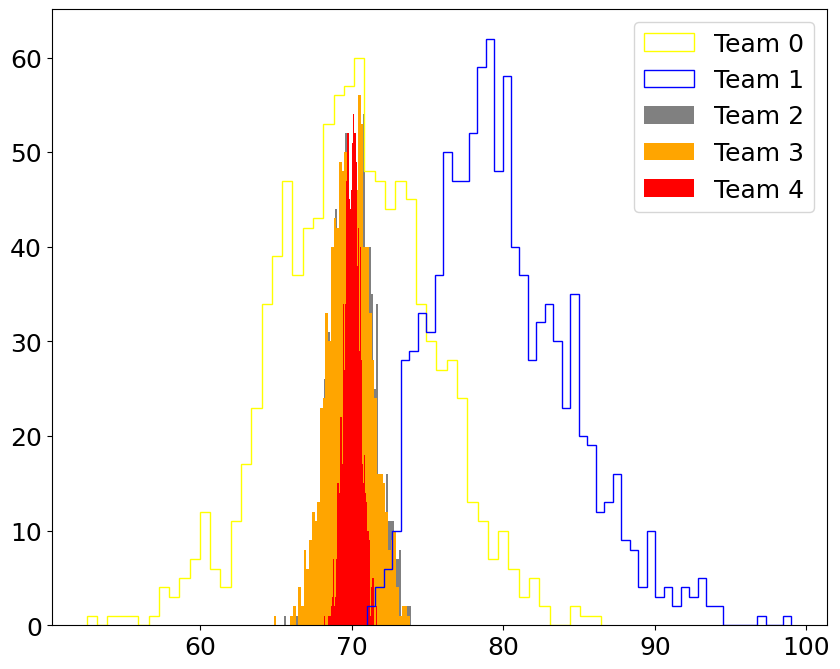

In [10]:
_ = pl.hist(X0, bins=50, histtype='step', color='yellow', label='Team 0')
_ = pl.hist(X1, bins=50, histtype='step', color='b', label='Team 1')
_ = pl.hist(X2, bins=50, histtype='stepfilled', color='gray', label='Team 2')
_ = pl.hist(X3, bins=50, histtype='stepfilled', color='orange', label='Team 3')
_ = pl.hist(X4, bins=50, histtype='stepfilled', color='red', label='Team 4')
_ = pl.legend()

print('Team 0: ', X0.mean(), "(", X0.std(), ')')
print('Team 1: ', X1.mean(), "(", X1.std(), ')')
print('Team 2: ', X2.mean(), "(", X2.std(), ')')
print('Team 3: ', X3.mean(), "(", X3.std(), ')')
print('Team 4: ', X4.mean(), "(", X4.std(), ')')
